In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
from transformers import  pipeline
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

In [9]:
nlp = spacy.load("en_core_web_sm")
medical_text=[
    "Patient has a history of hypertension and diabetes. Prescribed medication X.",
    "Asthma diagnosis confirmed. Patient advised o use inhaler daily.",
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and excercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed"
]

medical_df=pd.DataFrame({'MedicalText':medical_text})
medical_df.head()


,MedicalText
0,Patient has a history of hypertension and diab...
1,Asthma diagnosis confirmed. Patient advised o ...
2,Hypertension patient. Needs regular monitoring...
3,Diabetes patient. Recommended diet and excercise.
4,Patient diagnosed with hypertension. Medicatio...


In [10]:
def preprocess_text(text):

  text=text.lower()
  text=re.sub(r'\d+', '', text)
  text=re.sub(r'\W+', ' ', text)
  words=[word for word in text.split() if word not in stopwords.words('english')]
  return ''.join(words)


medical_df['CleanedText']=medical_df['MedicalText'].apply(preprocess_text)
medical_df.head()

,MedicalText,CleanedText
0,Patient has a history of hypertension and diab...,patienthistoryhypertensiondiabetesprescribedme...
1,Asthma diagnosis confirmed. Patient advised o ...,asthmadiagnosisconfirmedpatientadviseduseinhal...
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringblood...
3,Diabetes patient. Recommended diet and excercise.,diabetespatientrecommendeddietexcercise
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedhypertensionmedicationprescribed


In [11]:
def extract_entities(text):
  doc = nlp(text)
  return [(ent.text, ent.label_) for ent in doc.ents]

medical_df['Entities'] = medical_df['MedicalText'].apply(extract_entities)
medical_df.head()

,MedicalText,CleanedText,Entities
0,Patient has a history of hypertension and diab...,patienthistoryhypertensiondiabetesprescribedme...,"[(X., NORP)]"
1,Asthma diagnosis confirmed. Patient advised o ...,asthmadiagnosisconfirmedpatientadviseduseinhal...,"[(daily, DATE)]"
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringblood...,[]
3,Diabetes patient. Recommended diet and excercise.,diabetespatientrecommendeddietexcercise,[]
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedhypertensionmedicationprescribed,[]


In [12]:
sentiment_pipe = pipeline('sentiment-analysis')
medical_df['Sentiment'] = medical_df['MedicalText'] .apply(lambda x: sentiment_pipe(x)[0])
medical_df.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,MedicalText,CleanedText,Entities,Sentiment
0,Patient has a history of hypertension and diab...,patienthistoryhypertensiondiabetesprescribedme...,"[(X., NORP)]","{'label': 'NEGATIVE', 'score': 0.9301784634590..."
1,Asthma diagnosis confirmed. Patient advised o ...,asthmadiagnosisconfirmedpatientadviseduseinhal...,"[(daily, DATE)]","{'label': 'NEGATIVE', 'score': 0.9518197178840..."
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringblood...,[],"{'label': 'NEGATIVE', 'score': 0.9974162578582..."
3,Diabetes patient. Recommended diet and excercise.,diabetespatientrecommendeddietexcercise,[],"{'label': 'POSITIVE', 'score': 0.9564200043678..."
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedhypertensionmedicationprescribed,[],"{'label': 'NEGATIVE', 'score': 0.9567073583602..."


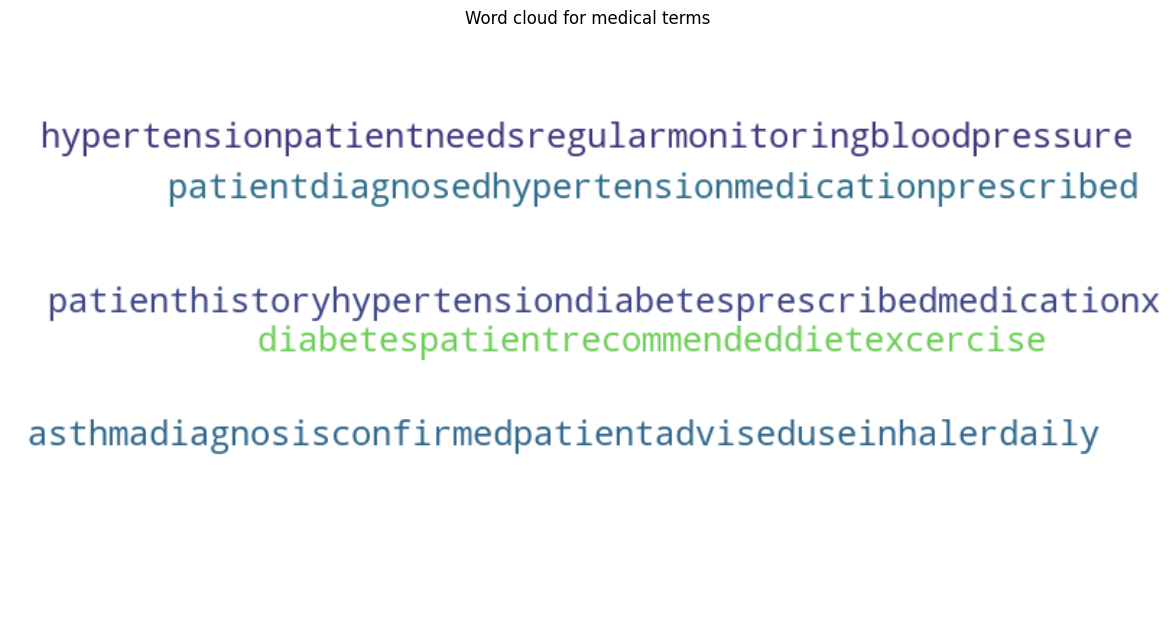

In [13]:
all_medical_terms = ' '.join(medical_df['CleanedText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200,
                      colormap='viridis',
                      collocations=False
                      ).generate(all_medical_terms)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for medical terms')
plt.tight_layout(pad=0)
plt.show()

In [14]:
def extract_insights(row):
  entities =row['Entities']
  sentiment=row['Sentiment']
  return{
      'Entities': entities,
      'Sentiment': sentiment['label'],
      'SentimentScore': sentiment['score']
  }

medical_df['Insights']=medical_df.apply(extract_insights, axis=1)
medical_df[['MedicalText', 'Insights']].head()

,MedicalText,Insights
0,Patient has a history of hypertension and diab...,"{'Entities': [('X.', 'NORP')], 'Sentiment': 'N..."
1,Asthma diagnosis confirmed. Patient advised o ...,"{'Entities': [('daily', 'DATE')], 'Sentiment':..."
2,Hypertension patient. Needs regular monitoring...,"{'Entities': [], 'Sentiment': 'NEGATIVE', 'Sen..."
3,Diabetes patient. Recommended diet and excercise.,"{'Entities': [], 'Sentiment': 'POSITIVE', 'Sen..."
4,Patient diagnosed with hypertension. Medicatio...,"{'Entities': [], 'Sentiment': 'NEGATIVE', 'Sen..."
